# Running the model with Pipeline and GridSearchCV


Pipelines in SciKit-Learn make it easier to combine several steps in a single, simple format. Here, we make a pipeline that includes the scaling transformation that it done before PCA, then the PCA dimensionality reduction, and finally we train a linear support vector classification model on the data.


First, we import the necessary packages:

In [52]:
import numpy as np
import random
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib notebook

Next, we load the data using `np.load()`. In another notebook I imported the data and performed some of the initial processing. This was done for expediency's sake - the data are originally in the form of 2565 individual text files, each containing the values of the 22 variables in columns. The data ranges in length from just 45 observations up to 136 observations, with an average around 57.

I imported each text file as an array and used the `array.ravel(order='F')` function to convert flatten the data. I then used `np.put()` to overwite the first *n* values in an array of `NaN`'s that matched the maximum length of any observation. The nett result is that the longest observation (with 136 data points across 22 variables) had the dimensions `[2992,]`. Each sample was added to a new row, and the y values (the word that the sign corresponds to, e.g. "Alive") were recorded in a seperate array.

In [11]:
x = np.load('x_npinterp.npy')
y = np.load('y.npy')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

The `make_pipeline()` function is a shortcut to the regular `pipeline()` function which does not require (nor permit) the naming of the functions (they are named automatically). Here, the `pipeline` includes `StandardScaler()` to scale the mean and variance of the data, then `PCA()` to reduce the dimensionality of the data, and finally `LinearSVC()` to classify the data.

`GridSearchCV` calls the fit and predict methods on the data (we'll use the `x_train` data from `train_test_split`) using a range of parameter values as defined in `param_grid` (below). Furthermore, the `GridSearchCV` function also performs cross validation on the data. In this case, the `cv` parameter was left as its default which will perform 3-fold cross validation.

The `param_grid` dictionary has two key:value pairs: the keys are named for the function in the pipeline (lower case) and the parameter of that function, seperated by two underscores. The values are those values which we'd like to test in the `GridSearchCV()` function.

As you can see, `GridSearchCV()` calls the pipeline we made above, and supplies the paramter grid. The grid search will test PCA n_components values from 50 to 100 and Linear SVC C parameter values from 0.02 to ~0.15. It should be noted that this runs 10 * 10 = 100 jobs, and runs 3-fold cross validation on all of them.

In [76]:
pipeline = make_pipeline(StandardScaler(), PCA(), LinearSVC())

#param_grid = {'pca__n_components': np.arange(50,100,5),
#              'linearsvc__C': 10 ** np.linspace(-2,-1,10)}

param_grid = {'C': 10. ** np.linspace(2,6,15),
             'gamma': 10 ** np.linspace(-7,-3.3,15)}

#param_grid = {'pca__n_components': [80],
#              'linearsvc__C': [0.0502]}

gridsearch = GridSearchCV(SVC(),param_grid,verbose=3,cv=3)

Now that the pipeline and gridsearch has been instantiated, we simply need to call the `fit()` method on the gridsearch and then wait...

In [77]:
gridsearch.fit(x_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] gamma=1e-07, C=100.0 ............................................
[CV] ................... gamma=1e-07, C=100.0, score=0.093333 -  10.0s
[CV] gamma=1e-07, C=100.0 ............................................
[CV] ................... gamma=1e-07, C=100.0, score=0.012500 -  10.2s
[CV] gamma=1e-07, C=100.0 ............................................
[CV] ................... gamma=1e-07, C=100.0, score=0.013158 -  10.6s
[CV] gamma=1.83774696539e-07, C=100.0 ................................
[CV] ....... gamma=1.83774696539e-07, C=100.0, score=0.093333 -  10.2s
[CV] gamma=1.83774696539e-07, C=100.0 ................................
[CV] ....... gamma=1.83774696539e-07, C=100.0, score=0.012500 -  10.3s
[CV] gamma=1.83774696539e-07, C=100.0 ................................
[CV] ....... gamma=1.83774696539e-07, C=100.0, score=0.013158 -  10.6s
[CV] gamma=3.37731390879e-07, C=100.0 ................................
[CV] ....... g

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:  5.1min



[CV] gamma=4.39397056076e-05, C=100.0 ................................
[CV] ....... gamma=4.39397056076e-05, C=100.0, score=0.636513 -   6.9s
[CV] gamma=8.07500606404e-05, C=100.0 ................................
[CV] ....... gamma=8.07500606404e-05, C=100.0, score=0.734815 -   6.4s
[CV] gamma=8.07500606404e-05, C=100.0 ................................
[CV] ....... gamma=8.07500606404e-05, C=100.0, score=0.732812 -   6.4s
[CV] gamma=8.07500606404e-05, C=100.0 ................................
[CV] ....... gamma=8.07500606404e-05, C=100.0, score=0.717105 -   6.5s
[CV] gamma=0.000148398178897, C=100.0 ................................
[CV] ....... gamma=0.000148398178897, C=100.0, score=0.810370 -   6.2s
[CV] gamma=0.000148398178897, C=100.0 ................................
[CV] ....... gamma=0.000148398178897, C=100.0, score=0.817187 -   6.3s
[CV] gamma=0.000148398178897, C=100.0 ................................
[CV] ....... gamma=0.000148398178897, C=100.0, score=0.782895 -   6.3s
[CV] 

[Parallel(n_jobs=1)]: Done 128 jobs       | elapsed: 18.2min
[Parallel(n_jobs=1)]: Done 288 jobs       | elapsed: 38.1min



[CV] gamma=3.85224842004e-06, C=5179.47467923 ........................
[CV]  gamma=3.85224842004e-06, C=5179.47467923, score=0.838519 -   6.2s
[CV] gamma=3.85224842004e-06, C=5179.47467923 ........................
[CV]  gamma=3.85224842004e-06, C=5179.47467923, score=0.828125 -   6.2s
[CV] gamma=3.85224842004e-06, C=5179.47467923 ........................
[CV]  gamma=3.85224842004e-06, C=5179.47467923, score=0.809211 -   6.3s
[CV] gamma=7.07945784384e-06, C=5179.47467923 ........................
[CV]  gamma=7.07945784384e-06, C=5179.47467923, score=0.874074 -   6.2s
[CV] gamma=7.07945784384e-06, C=5179.47467923 ........................
[CV]  gamma=7.07945784384e-06, C=5179.47467923, score=0.848437 -   6.2s
[CV] gamma=7.07945784384e-06, C=5179.47467923 ........................
[CV]  gamma=7.07945784384e-06, C=5179.47467923, score=0.853618 -   6.2s
[CV] gamma=1.30102521691e-05, C=5179.47467923 ........................
[CV]  gamma=1.30102521691e-05, C=5179.47467923, score=0.887407 -   6.1

[Parallel(n_jobs=1)]: Done 512 jobs       | elapsed: 61.9min
[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed: 79.1min finished


GridSearchCV(cv=3,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-07,   1.83775e-07,   3.37731e-07,   6.20665e-07,
         1.14062e-06,   2.09618e-06,   3.85225e-06,   7.07946e-06,
         1.30103e-05,   2.39096e-05,   4.39397e-05,   8.07501e-05,
         1.48398e-04,   2.72718e-04,   5.01187e-04]), 'C': array([  1.00000e+0...,   3.72759e+04,   7.19686e+04,   1.38950e+05,
         2.68270e+05,   5.17947e+05,   1.00000e+06])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)

Note that the `verbose=3` paramter in `GridSearchCV()` specifies the level of output. This can be supressed with lower integer values.

Now that the model is fit, we can score the model with the training and testing set. `GridSearchCV()` automatically stored the best parameters, so calling the `score()` method shows the best available scores.

I'm very pleased with the ~92% accuracy for the testing set at this stage.

In [80]:
print('The score on the training set is:',gridsearch.score(x_train,y_train))
print('The score on the testing set is:',gridsearch.score(x_test,y_test).round(4))

The score on the training set is: 0.999479979199
The score on the testing set is: 0.9097


It's also possible to list the best scores:

In [79]:
print('The',list(gridsearch.best_params_.keys())[0],'parameter value is:',list(gridsearch.best_params_.values())[0])
print('The',list(gridsearch.best_params_.keys())[1],'parameter value is:',list(gridsearch.best_params_.values())[1].round(4))

The gamma parameter value is: 0.000272718302937
The C parameter value is: 372.7594


The very last thing we can do is plot the two optimized parameters against each other in order to visualize the change in the score as the parameters were changed. Just like best parameters were stored in `best_params_` above, so are the grid scores for each parameter pair.

<IPython.core.display.Javascript object>


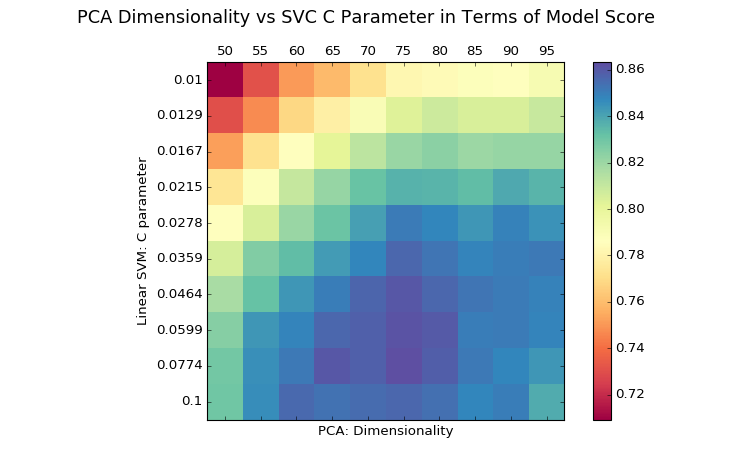

In [23]:
# Original plot
pca_dim = len(list(param_grid.values())[0])
c_dim = len(list(param_grid.values())[1])
scores = [x[1] for x in gridsearch.grid_scores_]
scores = np.array(scores).reshape(c_dim, pca_dim)

plt.matshow(scores, cmap='Spectral')
plt.xlabel('PCA: Dimensionality')
plt.ylabel('Linear SVM: C parameter')
plt.colorbar()
plt.xticks(np.arange(pca_dim), param_grid['pca__n_components'])
plt.yticks(np.arange(c_dim), param_grid['linearsvc__C'].round(4))
plt.suptitle('PCA Dimensionality vs SVC C Parameter in Terms of Model Score',fontsize=16)

<IPython.core.display.Javascript object>


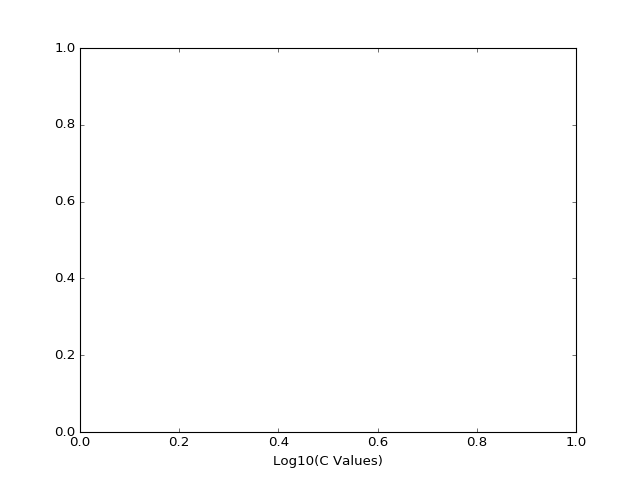

In [55]:
# line plot for simple linearSVC without PCA
scores = np.array([x[1] for x in gridsearch.grid_scores_])
values = np.log10(np.array([x for x in param_grid.values()]).ravel())
plt.plot(values,scores)
plt.xlabel('Log10(C Values)')
plt.ylabel('Score')
plt.suptitle('Score vs C parameter: LinearSVC()',fontsize=16)

<IPython.core.display.Javascript object>


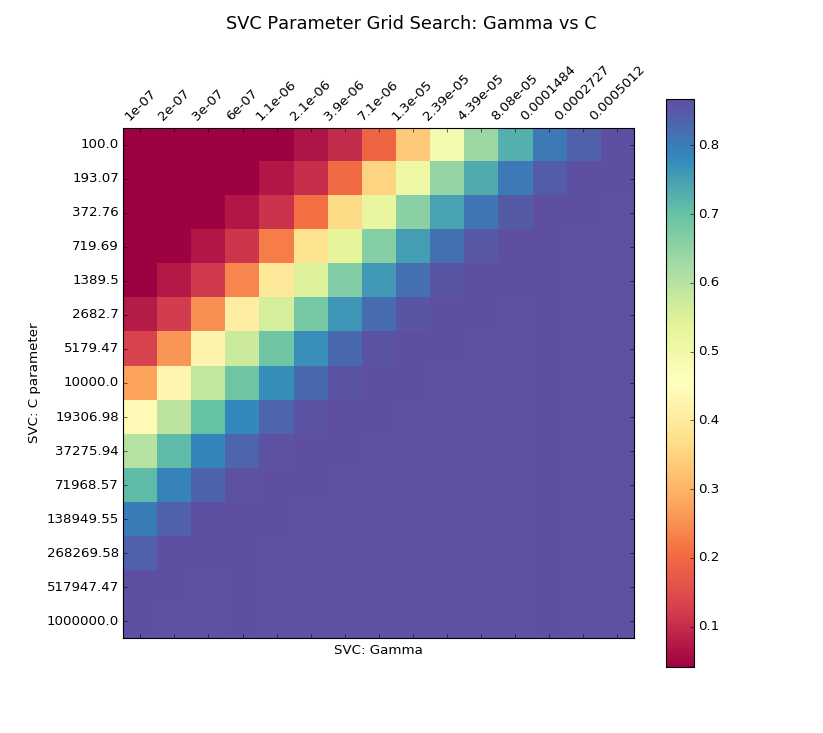

In [83]:
# C vs gamma plot for SVC() with rbf kernel
gamma_dim = len(list(param_grid.values())[0])
c_dim = len(list(param_grid.values())[1])
scores = [x[1] for x in gridsearch.grid_scores_]
scores = np.array(scores).reshape(c_dim, gamma_dim)

plt.matshow(scores, cmap='Spectral')
plt.xlabel('SVC: Gamma')
plt.ylabel('SVC: C parameter')
plt.colorbar()
plt.xticks(np.arange(gamma_dim), param_grid['gamma'].round(7),rotation=45)
plt.yticks(np.arange(c_dim), param_grid['C'].round(2))
plt.suptitle('SVC Parameter Grid Search: Gamma vs C',fontsize=16)